In [4]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# Create a sample data

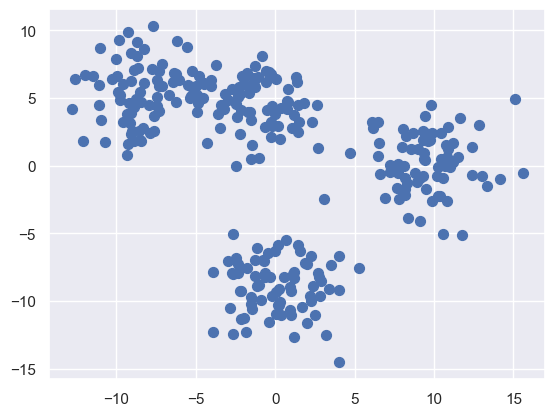

In [5]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300,
                       centers=4,
                       cluster_std=2.1,
                       random_state=7)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [6]:
# write kmeans code here
from sklearn.cluster import KMeans
mykmeans = KMeans(n_clusters = 4,random_state=7)
mykmeans.fit(X)

C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=7)

In [7]:
y_kmeans = mykmeans.predict(X)

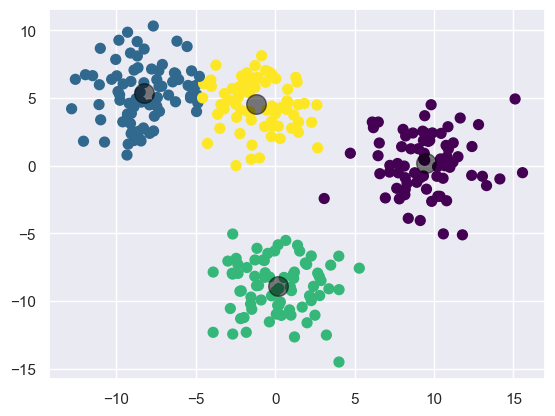

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = mykmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [9]:
# run kmeans for 5 cluster
from sklearn.cluster import KMeans
mykmeans = KMeans(n_clusters = 5,random_state=7)
mykmeans.fit(X)

C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=7)

In [10]:
y_kmeans = mykmeans.predict(X)

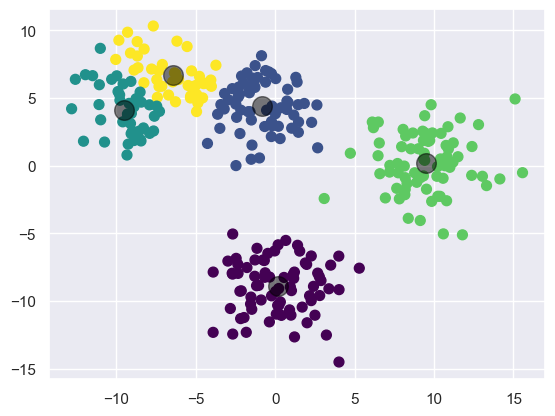

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = mykmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# DBSCAN

In [1]:
# outliers are mentioned as -1

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # standardization

Number of clusters: 3
Outliers : 17


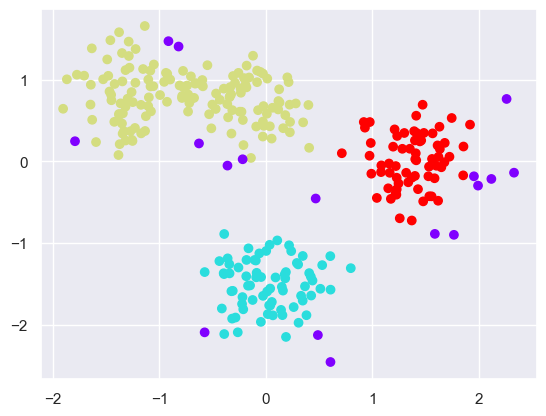

In [15]:
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# increase eps

Number of clusters: 2
Outliers : 1


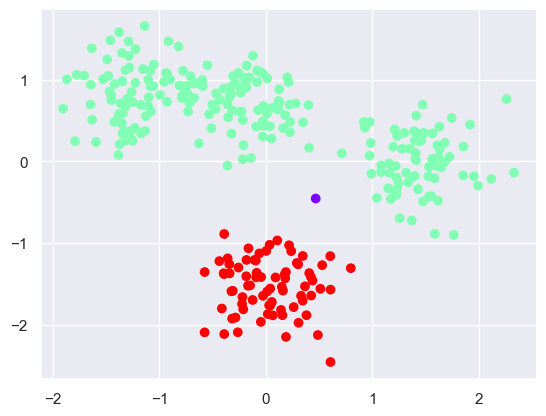

In [16]:
y_pred = DBSCAN(eps=0.5, min_samples=10).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

Number of clusters: 2
Outliers : 0


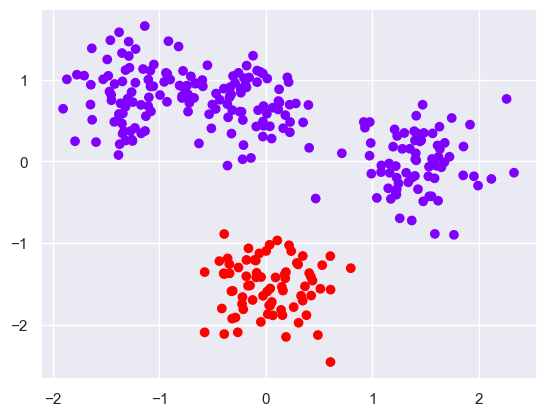

In [22]:
y_pred = DBSCAN(eps=0.6, min_samples=10).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# increase eps and min_samples

Number of clusters: 0
Outliers : 300


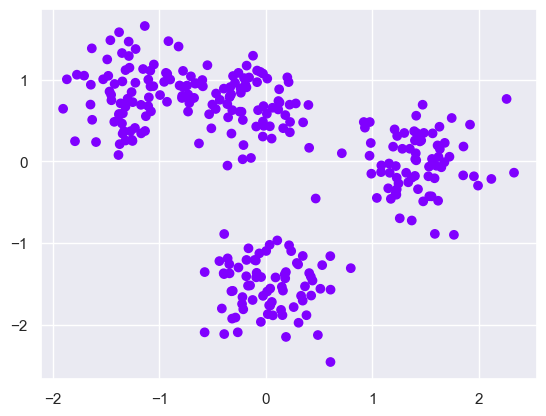

In [24]:
y_pred = DBSCAN(eps=0.6, min_samples=100).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# decrease eps

Number of clusters: 5
Outliers : 89


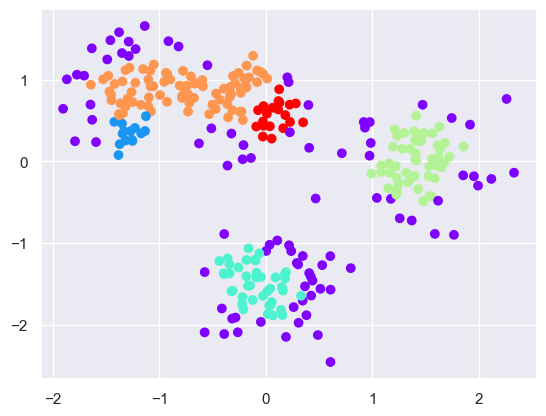

In [17]:
y_pred = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# increase min_samples

Number of clusters: 3
Outliers : 65


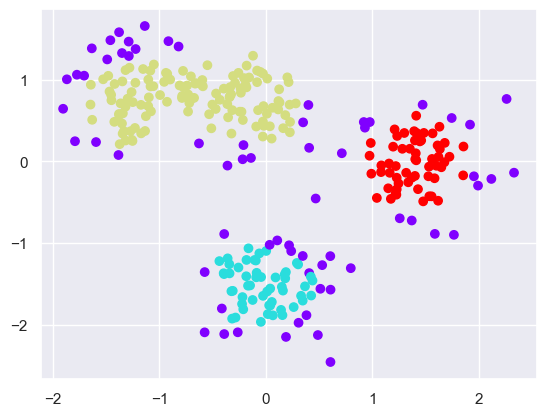

In [18]:
y_pred = DBSCAN(eps=0.3, min_samples=20).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# decrease min_samples

Number of clusters: 3
Outliers : 6


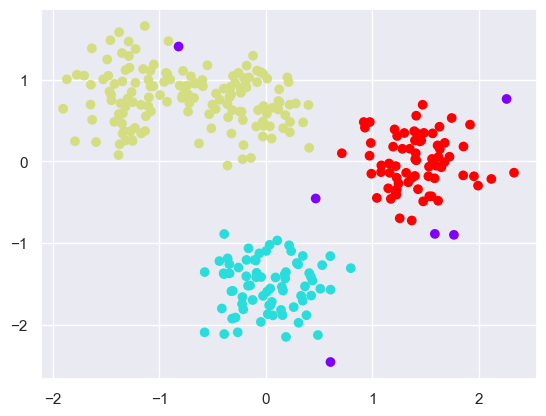

In [20]:
y_pred = DBSCAN(eps=0.3, min_samples=5).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# Knee finding in DBSCAN

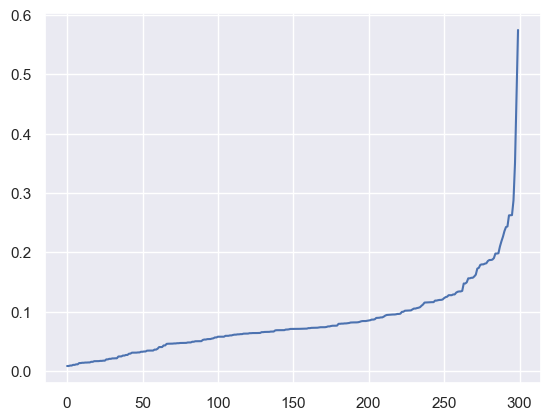

In [25]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)